In [1]:
import pickle as p
import numpy as np
import matplotlib.pyplot as plt
import tools as tl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
dataset=p.load(open("pimaDiabetes.p","rb"))

#Data Extraction
target = dataset['target']
data = dataset['data']
feature_names = dataset["feature_names"]

#Data description
print(dataset["DESCR"])

This dataset is originally from the National
Institute of Diabetes and Digestive and Kidney Diseases.
The objective of the dataset is to diagnostically predict
whether or not a patient has diabetes, based on certain
diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these
instances from a larger database. In particular, all patients
here are females at least 21 years old of Pima Indian heritage.
The dataset contains information of 768 women from a population
near Phoenix, Arizona, USA. The outcome tested was Diabetes,
268 tested positive and 500 tested negative.

For more inforamtion:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S.
(1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus.
In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265).
IEEE Computer Society Press.


| Qualidade | Gama de Valores|
| :-: | :-: |
| Número de gravidezes | [0, 17] | 
| Concentração de glicose plasmática em 2 horas num teste oral de tolerância à glicose | [0, 199] |
| Pressão arterial diastólica (mm Hg) | [0, 122] |
| Espessura da dobra cutânea dos tríceps (mm) | [0, 99] |
| Nível sérico de insulina em 2 horas (µh/ml) | [0, 846] |
| Índice de massa corporal (peso em kg/altura em m) | [0, 67.1] |
| Diabetes Pedigree Function | [0.078, 2.42] |
| Idade (anos) | [21, 81] |

## Divisão do data set
| treino | teste | validação |
| :-: | :-: | :-: | 
| 80% | 10% | 10% |

In [3]:
X2, treino_data, y2, treino_target = train_test_split(data, target, test_size=80/100, random_state=42, stratify=target)
valid_data, teste_data, valid_target, teste_target = train_test_split(X2,y2, test_size=1/2, random_state=42, stratify=y2)

print("treino_data", treino_data.shape, "\ttreino_target",treino_target.shape)
print("valid_data", valid_data.shape, "\tvalid_target",valid_target.shape)
print("teste_data", teste_data.shape, "\ttest_target",teste_target.shape)

# [:,0] - n gravidez
# [:,1] - glicose
# [:,2] - pressao arterial
# [:,3] - dobra do tricep
# [:,4] - nivel de insulina
# [:,5] - IMC
# [:,6] - DPF
# [:,7] - idade

treino_data (615, 8) 	treino_target (615,)
valid_data (76, 8) 	valid_target (76,)
teste_data (77, 8) 	test_target (77,)


In [4]:
#Normalização do conjunto de treino
norm_treino_data = tl.normalize_data(treino_data)

#Normalização do conjunto de teste
norm_teste_data = tl.normalize_data(teste_data)

#Normalização do conjunto de validação
norm_valid_data = tl.normalize_data(valid_data)

In [5]:
# Grelha de parâmetros com os vários parâmetros que vão ser utilizados para encontrar a melhor combinação de parâmetros
lr_param_grid = {
    'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10],
    'max_iter': [300, 400, 500, 600, 700, 800, 900, 1000]
}

# Inicializar o classificador
lr = LogisticRegression(random_state=42)

lr_params = tl.get_best_params(lr_param_grid, lr, treino_data, treino_target)
print(lr_params)

{'C': 1.5, 'max_iter': 300}


In [5]:
lr_params = {'C': 1.5, 'max_iter': 300} #resultado do get_best_params
lr = LogisticRegression(C=lr_params['C'], max_iter=lr_params['max_iter'], random_state=42)
lr = lr.fit(treino_data, treino_target)


True Positives 48 (96.0%)            
False Negatives 2 (4.0%)            

True Negatives 20 (74.0%)            
False Positives 7 (26.0%)            

Recall Rate: 96.0%            
Specificity Rate: 74.1%            

Positive Precision : 87.3%            
Negative Precision : 90.9%            

F-Score : 91.4435%            
G-Score : 91.5467%
Score: 83.61%


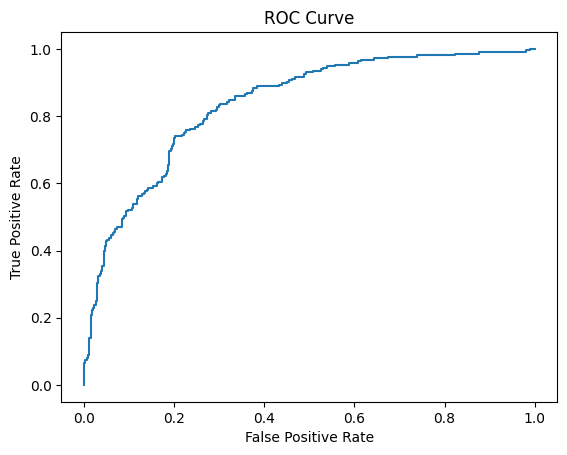

In [15]:
lr_pred = lr.predict(teste_data)

tl.predition_stats(teste_target,lr_pred)

# Curva ROC
t2logR = lr.decision_function(treino_data)
tl.ROC_curve(treino_target,t2logR)

---

In [24]:
# Grid de parâmetros para procurar a melhor combinação
rf_param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200],# Número de árvores
    'max_depth': [None, 6, 7, 8, 9, 10, 11],    # Profundidade máxima das árvores
    'min_samples_split': [2, 5],               # Amostras mínimas para dividir um nó
    'min_samples_leaf': [1, 2]                 # Amostras mínimas nas folhas
}

rf = RandomForestClassifier(random_state=42)

# Encontrar os melhores parâmetros
rf_params = tl.get_best_params(rf_param_grid, rf, treino_data, treino_target)
print(rf_params)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}



True Positives 45 (90.0%)            
False Negatives 5 (10.0%)            

True Negatives 19 (70.0%)            
False Positives 8 (30.0%)            

Recall Rate: 90.0%            
Specificity Rate: 70.4%            

Positive Precision : 84.9%            
Negative Precision : 79.2%            

F-Score : 87.3756%            
G-Score : 87.4128%
Score: 96.08%


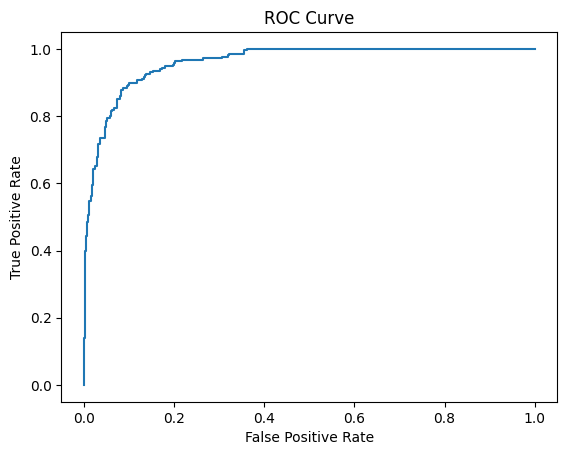

In [ ]:
rf_params = {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}  #resultado do get_best_params

rf = RandomForestClassifier(**rf_params, random_state=42)
rf.fit(treino_data, treino_target)

rf_pred = rf.predict(teste_data) 
tl.predition_stats(teste_target, rf_pred)

pp_rf = rf.predict_proba(treino_data)[:, 1]
tl.ROC_curve(treino_target,pp_rf)

---

In [38]:
# Definir a grade de parâmetros
svc_param_grid = {
    'C': [1, 2, 3, 4, 5, 6, 7],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svc = SVC(random_state=42)

svc_params = tl.get_best_params(svc_param_grid, svc, treino_data, treino_target)
print(svc_params)

{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svc_params = {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'} #resultado do get_best_params

svc = SVC(**svc_params, random_state=42)
svc.fit(treino_data, treino_target)


True Positives 48 (96.0%)            
False Negatives 2 (4.0%)            

True Negatives 16 (59.0%)            
False Positives 11 (41.0%)            

Recall Rate: 96.0%            
Specificity Rate: 59.3%            

Positive Precision : 81.4%            
Negative Precision : 88.9%            

F-Score : 88.0992%            
G-Score : 88.3991%
Score: 96.08%


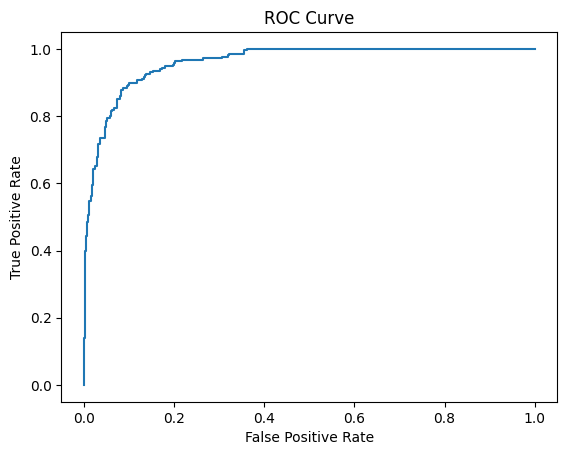

In [46]:
svc_pred = svc.predict(teste_data)
tl.predition_stats(teste_target, svc_pred)

pp_svc = svc.decision_function(treino_data)
tl.ROC_curve(treino_target,pp_rf) 